In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv("Placement.csv")

In [3]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [4]:
dataset.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [5]:
dataset.drop('sl_no',inplace = True, axis =1)

In [6]:
def quanqual(dataset):
    qual = []
    quan = []
    for columnName in dataset.columns:
        if (dataset[columnName].dtype == 'O'):
            qual.append(columnName)
        else:
            quan.append(columnName)
    return quan,qual

In [7]:
quan,qual = quanqual(dataset)

In [8]:
quan

['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

In [9]:
qual

['gender',
 'ssc_b',
 'hsc_b',
 'hsc_s',
 'degree_t',
 'workex',
 'specialisation',
 'status']

Replace the NaN values with correct value.

In [10]:
# Column which is having the NAN is salary.
# since the student is not placed so no salary. So replacing the NAN value of salary with 0

In [10]:
quandata = dataset[quan]

In [11]:
quandata["salary"].fillna(0,inplace = True)

In [12]:
quandata

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,67.00,91.00,58.00,55.0,58.80,270000.0
1,79.33,78.33,77.48,86.5,66.28,200000.0
2,65.00,68.00,64.00,75.0,57.80,250000.0
3,56.00,52.00,52.00,66.0,59.43,0.0
4,85.80,73.60,73.30,96.8,55.50,425000.0
...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,400000.0
211,58.00,60.00,72.00,74.0,53.62,275000.0
212,67.00,67.00,73.00,59.0,69.72,295000.0
213,74.00,66.00,58.00,70.0,60.23,204000.0


In [13]:
cate = dataset[qual]

In [14]:
cate

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...
210,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [15]:
preprocessed = pd.concat([quandata,cate],axis = 1)

In [16]:
preprocessed

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,67.00,91.00,58.00,55.0,58.80,270000.0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,79.33,78.33,77.48,86.5,66.28,200000.0,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,65.00,68.00,64.00,75.0,57.80,250000.0,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,56.00,52.00,52.00,66.0,59.43,0.0,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,85.80,73.60,73.30,96.8,55.50,425000.0,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,400000.0,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,58.00,60.00,72.00,74.0,53.62,275000.0,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,67.00,67.00,73.00,59.0,69.72,295000.0,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,74.00,66.00,58.00,70.0,60.23,204000.0,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [17]:
preprocessed.isnull().sum()

ssc_p             0
hsc_p             0
degree_p          0
etest_p           0
mba_p             0
salary            0
gender            0
ssc_b             0
hsc_b             0
hsc_s             0
degree_t          0
workex            0
specialisation    0
status            0
dtype: int64

In [18]:
preprocessed.to_csv("Preprocessed.csv",index = False)

How many of them are not placed?

In [19]:
preprocessed.groupby('status').size().reset_index(name='Count')

,status,Count
0,Not Placed,67
1,Placed,148


In [ ]:
#About 67 students are not placed.

Find the reason for non placement from the dataset?

In [20]:
preprocessed[preprocessed['status']=='Not Placed']

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
3,56.0,52.0,52.00,66.00,59.43,0.0,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
5,55.0,49.8,67.25,55.00,51.58,0.0,M,Others,Others,Science,Sci&Tech,Yes,Mkt&Fin,Not Placed
6,46.0,49.2,79.00,74.28,53.29,0.0,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Not Placed
9,58.0,70.0,61.00,54.00,52.21,0.0,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Not Placed
12,47.0,55.0,65.00,62.00,65.04,0.0,F,Central,Others,Science,Comm&Mgmt,No,Mkt&HR,Not Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,67.0,70.0,65.00,88.00,71.96,0.0,F,Central,Central,Commerce,Others,No,Mkt&HR,Not Placed
201,54.2,63.0,58.00,79.00,58.44,0.0,M,Central,Others,Science,Comm&Mgmt,No,Mkt&HR,Not Placed
206,41.0,42.0,60.00,97.00,53.39,0.0,M,Central,Central,Science,Comm&Mgmt,No,Mkt&Fin,Not Placed
208,43.0,60.0,65.00,92.66,62.92,0.0,F,Central,Others,Science,Comm&Mgmt,No,Mkt&HR,Not Placed


In [36]:
preprocessed[preprocessed['status']=='Placed']

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,67.00,91.00,58.00,55.0,58.80,270000.0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,79.33,78.33,77.48,86.5,66.28,200000.0,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,65.00,68.00,64.00,75.0,57.80,250000.0,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
4,85.80,73.60,73.30,96.8,55.50,425000.0,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
7,82.00,64.00,66.00,67.0,62.14,252000.0,M,Central,Central,Science,Sci&Tech,Yes,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,62.00,72.00,65.00,67.0,56.49,216000.0,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
210,80.60,82.00,77.60,91.0,74.49,400000.0,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,58.00,60.00,72.00,74.0,53.62,275000.0,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,67.00,67.00,73.00,59.0,69.72,295000.0,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed


In [ ]:
# I didnt find the specific reason for non placement from the dataset.

4)What kind of relation between salary and mba_p

In [22]:
dataset.cov(numeric_only=True)

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,117.228377,60.348373,42.897137,37.659225,24.535952,2.877739e+04
hsc_p,60.348373,118.755706,34.819820,35.461678,22.555846,6.697772e+04
degree_p,42.897137,34.819820,54.151103,21.929469,17.272020,-1.173995e+04
etest_p,37.659225,35.461678,21.929469,176.251018,16.886973,2.287876e+05
mba_p,24.535952,22.555846,17.272020,16.886973,34.028376,9.624979e+04
salary,28777.386468,66977.716032,-11739.948520,228787.619507,96249.789024,8.734295e+09


In [23]:
dataset.corr(numeric_only=True)

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478,0.035330
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823,0.076819
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364,-0.019272
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055,0.178307
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000,0.175013
salary,0.035330,0.076819,-0.019272,0.178307,0.175013,1.000000


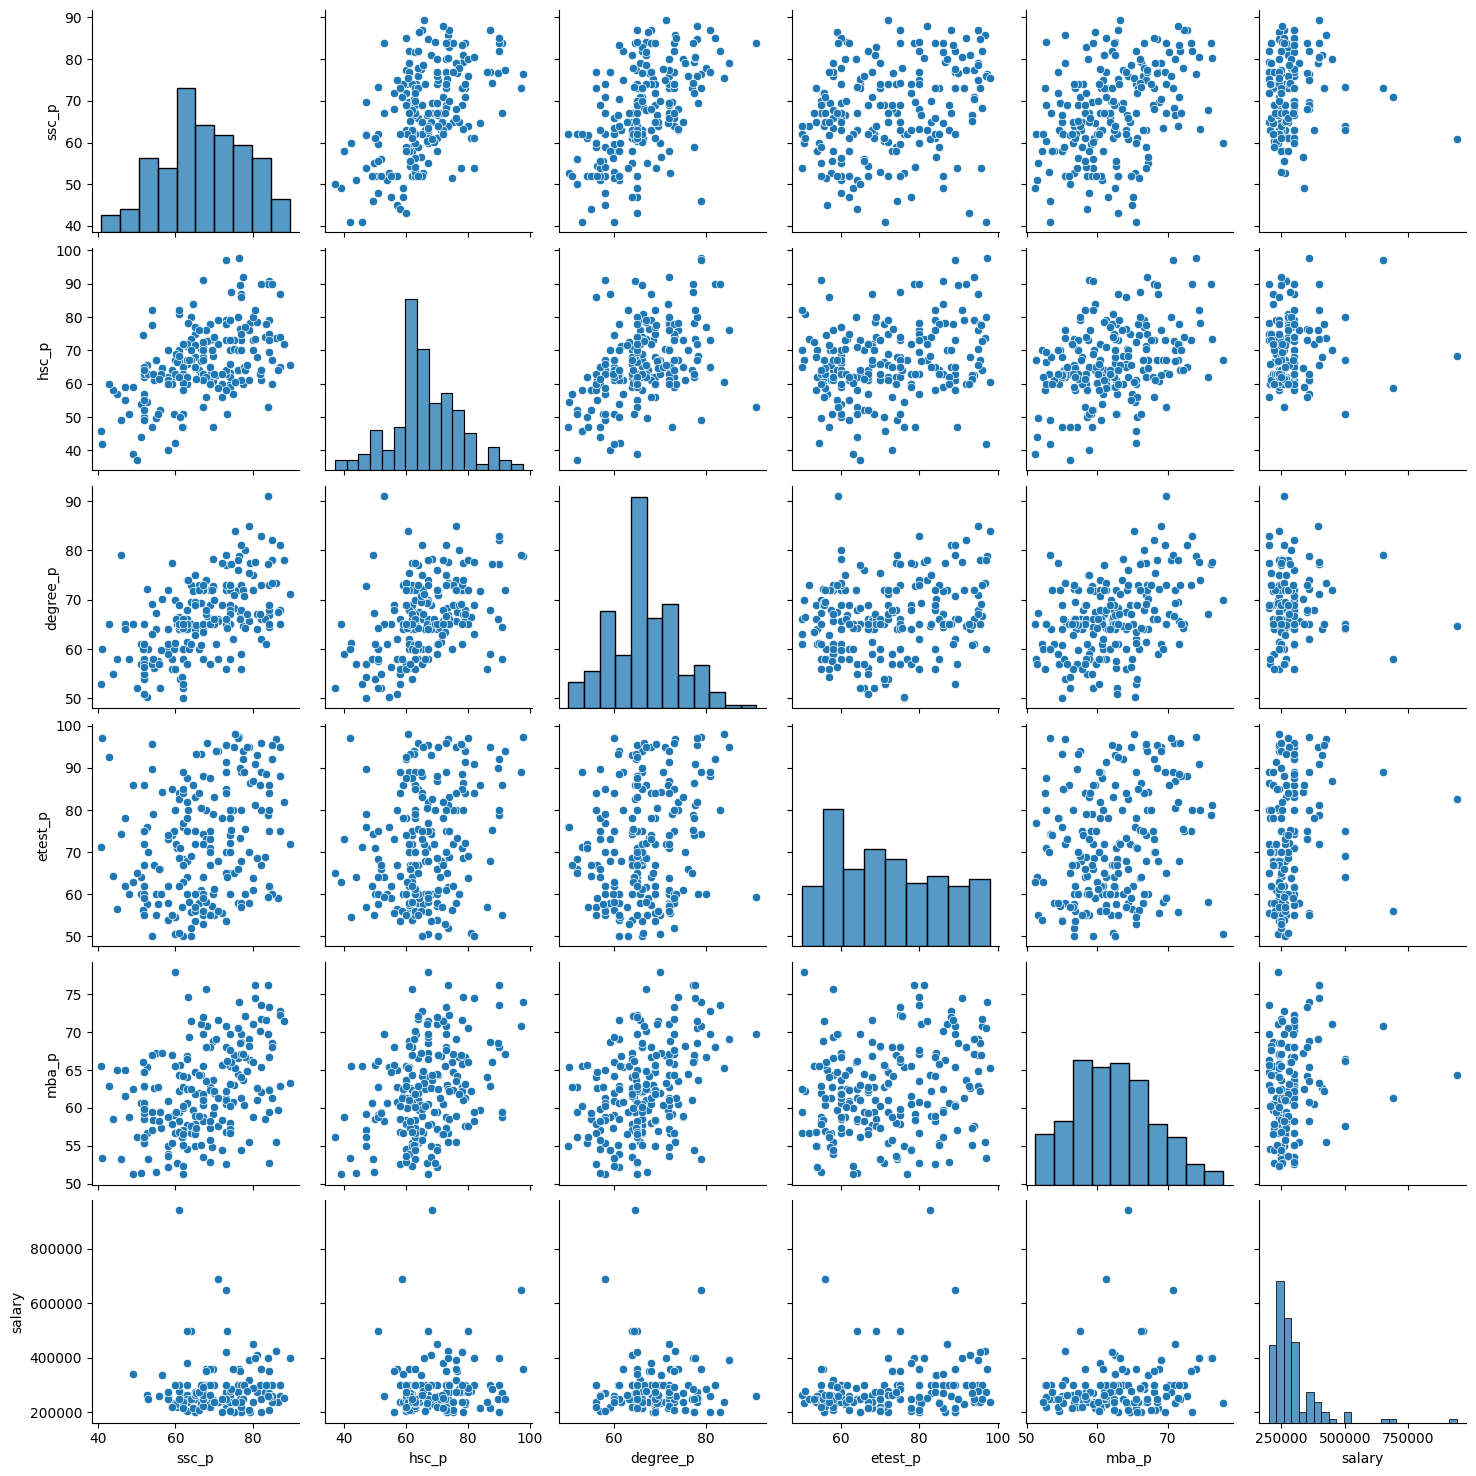

In [24]:
import seaborn as sns
sns.pairplot(dataset)

In [25]:
# There is zero correlation between mba_p and salary. since there is no pattern between them 

5)Which specialization is getting minimum salary?

In [26]:
dataset['specialisation'].value_counts()

specialisation
Mkt&Fin    120
Mkt&HR      95
Name: count, dtype: int64

In [28]:
#filtered_df = dataset[dataset['salary'] > 0.00] 
dataset.groupby('specialisation')['salary'].min().reset_index()

,specialisation,salary
0,Mkt&Fin,200000.0
1,Mkt&HR,200000.0


In [44]:
dataset.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [ ]:
#Both Specialisation get the minimum salary as 200000.0

6)How many of them getting above 500000 salary?

In [43]:
dataset[dataset['salary'] > 500000].value_counts()

gender  ssc_p  ssc_b    hsc_p  hsc_b    hsc_s     degree_p  degree_t   workex  etest_p  specialisation  mba_p  status  salary  
F       73.0   Central  97.00  Others   Commerce  79.0      Comm&Mgmt  Yes     89.00    Mkt&Fin         70.81  Placed  650000.0    1
M       60.8   Central  68.40  Central  Commerce  64.6      Comm&Mgmt  Yes     82.66    Mkt&Fin         64.34  Placed  940000.0    1
        71.0   Central  58.66  Central  Science   58.0      Sci&Tech   Yes     56.00    Mkt&Fin         61.30  Placed  690000.0    1
Name: count, dtype: int64

In [ ]:
#3 students from Mkt&Fin getting salary more than 500000

7)Test the Analysis of Variance between etest_p and mba_p at signifance
level 5%.(Make decision using Hypothesis Testing)

In [ ]:
#Statement: Test whether etest_p and  mba_p at significant level 5%?
#Null hypothesis=There is no similarity between etest_p and  mba_p
#Alternate hypothesis=There is similarity between etest_p and  mba_p

In [21]:
import scipy.stats as stats

stats.f_oneway(dataset['etest_p'],dataset['mba_p'])


F_onewayResult(statistic=np.float64(98.64487057324708), pvalue=np.float64(4.672547689133573e-21))

In [ ]:
#If p value is <0.05 then Reject Null hypothesis 
# Here p value is greater than 0.05 so accepting Null Hypothesis and Rejecting Alternate hypothsis

8)Test the similarity between the degree_t(Sci&Tech) and specialisation(
Mkt&HR) with respect to salary at significance level of 5%.(Make
decision using Hypothesis Testing)

Independant Sample- Unpaired T Test
Diferrent Group of degree_p, specialisation but same contion(salary)

In [ ]:
#Statement: Test whether degree_t(Sci&Tech) and specialisation( Mkt&HR) w.r.t salary similar at significant level 5%?
#Null hypothesis=There is no similarity between degree_t(Sci&Tech) and specialisation( Mkt&HR) w.r.t salary
#Alternate hypothesis=There is similarity between degree_t(Sci&Tech) and specialisation( Mkt&HR) w.r.t salary

In [23]:
from scipy.stats import ttest_ind
dataset=dataset.dropna()
specialisation = dataset[dataset['specialisation']=='Mkt&Fin']['salary']
degree = dataset[dataset['degree_t']=='Sci&Tech']['salary']
ttest_ind(specialisation, degree)

TtestResult(statistic=np.float64(-0.7968218741453793), pvalue=np.float64(0.42696403773206526), df=np.float64(134.0))

In [ ]:
#If p value is <0.05 then Reject Null hypothesis 
# Here p value is greater than 0.05 so accepting Null Hypothesis and Rejecting Alternate hypothsis

9)Convert the normal distribution to standard normal distribution for
salary column

<Axes: xlabel='salary', ylabel='Density'>

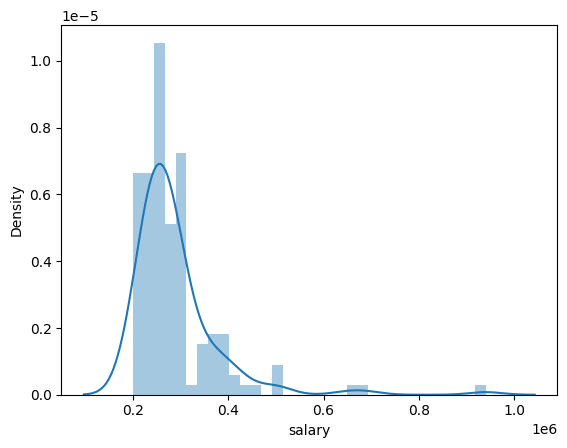

In [95]:
import seaborn as sns
sns.distplot(dataset["salary"])

In [90]:
def stdNBgraph(dataset):
        # Coverted to standard Normal Distribution
    import seaborn as sns
    mean=dataset.mean()
    std=dataset.std()

    values=[i for i in dataset]

    z_score=[((j-mean)/std) for j in values]
    
    sns.distplot(z_score,kde=True)

    sum(z_score)/len(z_score)
    print(sum(z_score)/len(z_score))
    #z_score.std()

1.7478511130923073e-16


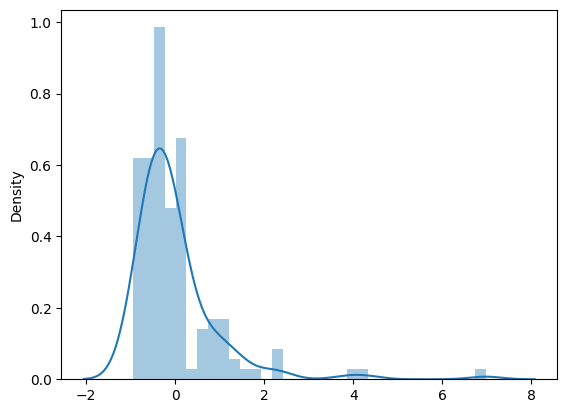

In [94]:
stdNBgraph(dataset["salary"])

10)What is the probability Density Function of the salary range from
700000 to 900000?

In [96]:
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    # generate a sample
    sample = dataset
    # calculate parameters
    sample_mean =sample.mean()
    sample_std = sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    # define the distribution
    dist = norm(sample_mean, sample_std)
    
    # sample probabilities for a range of outcomes
    values = [value for value in range(startrange, endrange)]
    probabilities = [dist.pdf(value) for value in values]    
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob
    

Mean=288655.405, Standard Deviation=93457.452
The area between range(700000,900000):5.377578376230696e-06


np.float64(5.377578376230696e-06)

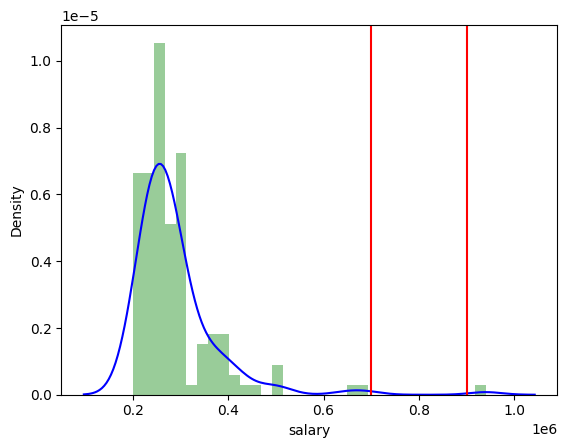

In [98]:
get_pdf_probability(dataset["salary"],700000,900000)

11)Test the similarity between the degree_t(Sci&Tech)with respect to
etest_p and mba_p at significance level of 5%.(Make decision using Hypothesis
Testing)

Dependant Sample-Paired T_Test
Same Group(degree_t) but Different Condition(etest_p,mba_p)

In [ ]:
#Statement: Test whether etest_p and  mba_p w.r.t degree(Sci&Tech) at significant level 5%?
#Null hypothesis=There is no similarity between etest_p and  mba_p w.r.t degree(Sci&Tech) 
#Alternate hypothesis=There is similarity between etest_p and  mba_p w.r.t degree(Sci&Tech) 

In [99]:
from scipy.stats import ttest_rel
#dataset=dataset.dropna()
etest = dataset[dataset['degree_t']=='Sci&Tech']['etest_p']
mba = dataset[dataset['degree_t']=='Sci&Tech']['mba_p']
ttest_rel(etest, mba)

TtestResult(statistic=np.float64(4.915474373730152), pvalue=np.float64(1.5494422054952274e-05), df=np.int64(40))

In [100]:
#If p value is <0.05 then Reject Null hypothesis 
# Here p value is greater than 0.05 so accepting Null Hypothesis and Rejecting Alternate hypothsis

12)Which parameter is highly correlated with salary?

In [101]:
dataset.corr(numeric_only=True)

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.293416,0.380657,0.317892,0.430560,0.035330
hsc_p,0.293416,1.000000,0.221307,0.284672,0.329983,0.076819
degree_p,0.380657,0.221307,1.000000,0.217683,0.494093,-0.019272
etest_p,0.317892,0.284672,0.217683,1.000000,0.284143,0.178307
mba_p,0.430560,0.329983,0.494093,0.284143,1.000000,0.175013
salary,0.035330,0.076819,-0.019272,0.178307,0.175013,1.000000


In [ ]:
#There is no correlation between salary with other parameters.

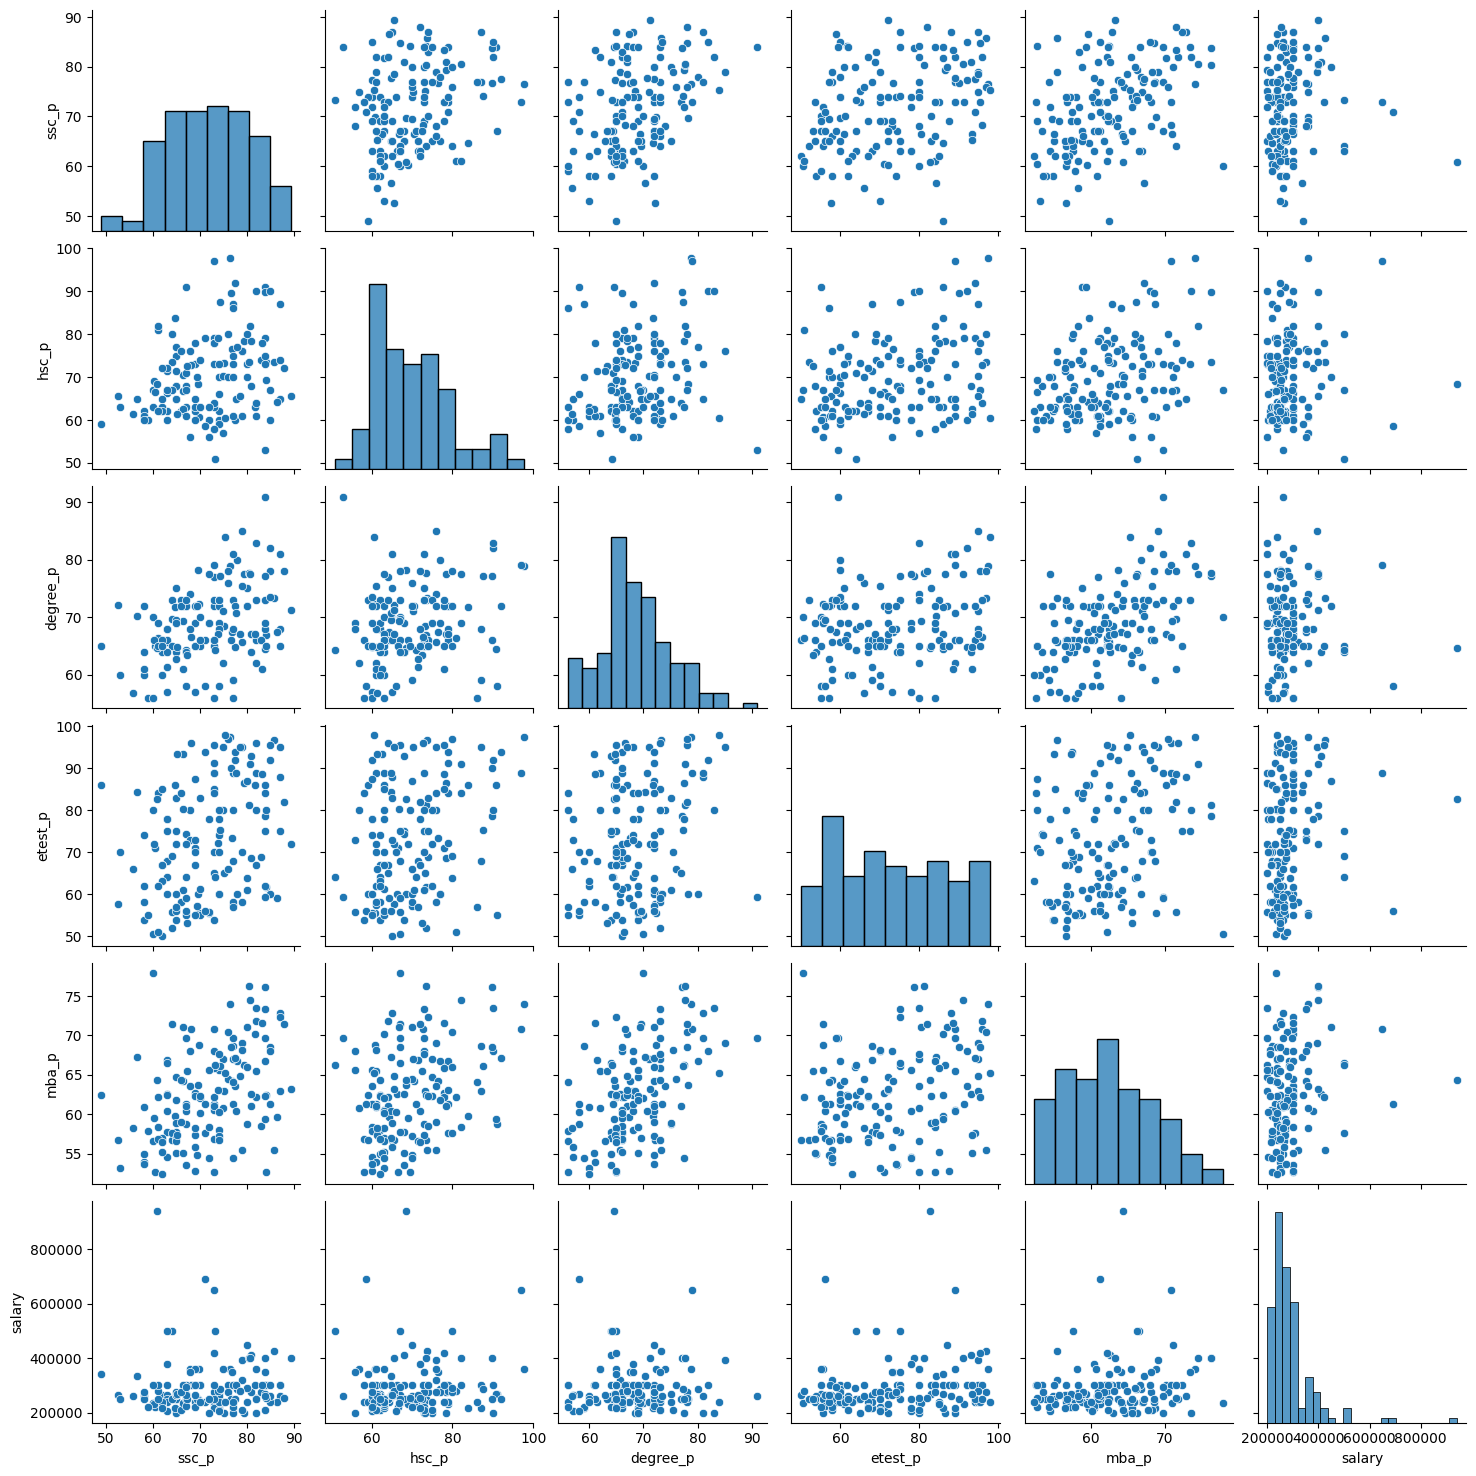

In [107]:
import seaborn as sns
sns.pairplot(dataset)